In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning tools
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score  

In [2]:
#loading the data from CSV
df_building = pd.read_csv('/workspaces/2nd_semester_project/notebooks/df_bikelane_weather.csv')
df_bikelane = pd.read_csv('/workspaces/2nd_semester_project/notebooks/df_bikelane_weather.csv')

In [3]:
# dropping observations with missing values in the radar columns
df_building = df_building.dropna(subset=['radar_0'])
df_bikelane = df_bikelane.dropna(subset=['radar_0'])

In [4]:
# Making a dataframe for the features we wish to cluster on
building_mag = df_building[["x","y","z"]]
bikelane_mag = df_bikelane[["x","y","z"]]

In [5]:
# Normalizing the data
scaler = StandardScaler()
building_mag_norm = scaler.fit_transform(building_mag)
bikelane_mag_norm = scaler.fit_transform(bikelane_mag)
# Clustering the magnetic field data with 2 clusters using kmeans
building_kmeans = KMeans(n_clusters=2, random_state=0).fit(building_mag_norm)
bikelane_kmeans = KMeans(n_clusters=2, random_state=0).fit(bikelane_mag_norm)

In [6]:
# Adding cluster labels to the mag dataframe
building_mag = building_mag.copy() #dealing with an error
bikelane_mag = bikelane_mag.copy() #dealing with an error
building_mag['mag_cluster'] = building_kmeans.labels_
bikelane_mag['mag_cluster'] = bikelane_kmeans.labels_
df_building = df_building.copy() #dealing with an error
df_bikelane = df_bikelane.copy() #dealing with an error
df_building['mag_cluster'] = building_mag['mag_cluster']
df_bikelane['mag_cluster'] = bikelane_mag['mag_cluster']

In [7]:
# Renaming the cluster labels to 'detection' and 'no_detection'
df_building['mag_cluster'].replace({0: 'no_detection', 1: 'detection'}, inplace=True)
df_bikelane['mag_cluster'].replace({0: 'no_detection', 1: 'detection'}, inplace=True)

In [8]:
# Fixing an error with the mag_cluster column type
df_building['mag_cluster'] = df_building['mag_cluster'].astype(str)
df_building['mag_cluster'].replace('nan', None, inplace=True)  # Replace 'nan' string with actual None
df_bikelane['mag_cluster'] = df_bikelane['mag_cluster'].astype(str)
df_bikelane['mag_cluster'].replace('nan', None, inplace=True)  # Replace 'nan' string with actual None

In [9]:
df_bikelane['mag_cluster'].value_counts()

mag_cluster
no_detection    6793
detection        253
Name: count, dtype: int64

# Clustering with radar data

# Making a dataframe for the features we wish to cluster on

In [10]:
# Making a dataframe for the features we wish to cluster on
building_radar = df_building[['radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7']]
bikelane_radar = df_bikelane[['radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7']]

In [11]:
# Normalizing the data
scaler = StandardScaler()
building_radar_norm = scaler.fit_transform(building_radar)
bikelane_radar_norm = scaler.fit_transform(bikelane_radar)
# Clustering the magnetic field data with 2 clusters using kmeans
building_kmeans = KMeans(n_clusters=3, random_state=0).fit(building_radar_norm)
bikelane_kmeans = KMeans(n_clusters=3, random_state=0).fit(bikelane_radar_norm)

In [12]:
# Adding cluster labels to the radar dataframe
building_radar = building_radar.copy() #dealing with an error
bikelane_radar = bikelane_radar.copy() #dealing with an error
building_radar['radar_cluster'] = building_kmeans.labels_
bikelane_radar['radar_cluster'] = bikelane_kmeans.labels_
df_building = df_building.copy() #dealing with an error
df_bikelane = df_bikelane.copy() #dealing with an error
df_building['radar_cluster'] = building_radar['radar_cluster']
df_bikelane['radar_cluster'] = bikelane_radar['radar_cluster']

In [13]:
df_building['radar_cluster'].value_counts()

radar_cluster
0    5936
1    1071
2      39
Name: count, dtype: int64

In [14]:
# Comparing the clusters with the detection status
df_building.groupby(['radar_cluster', 'mag_cluster']).size()

radar_cluster  mag_cluster 
0              detection          2
               no_detection    5934
1              detection        251
               no_detection     820
2              no_detection      39
dtype: int64

In [17]:
#Finding information about when the radar cluster is 1 and the magnetic cluster is no detection
df_isdiff = df_building[(df_building['radar_cluster'] == 1) & (df_building['mag_cluster'] == 'detection')]

In [19]:
df_isdiff

,time,battery,temperature,x,y,z,radar_0,radar_1,radar_2,radar_3,...,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,date,hour,day_of_week,day_name,package_type_encoded,mag_cluster,radar_cluster
35,2024-03-01 05:55:01.806,3.04,3.000,-219,432,-1312,153.0,93.0,51.0,41.0,...,4.8305,0.282,0.273,2024-03-01,5,4,Friday,0,detection,1
36,2024-03-01 06:04:59.793,3.06,3.125,-232,431,-1270,129.0,73.0,45.0,25.0,...,4.7305,0.280,0.274,2024-03-01,6,4,Friday,1,detection,1
37,2024-03-01 06:15:03.793,3.06,4.000,-237,427,-1255,129.0,73.0,45.0,25.0,...,4.7305,0.280,0.274,2024-03-01,6,4,Friday,1,detection,1
38,2024-03-01 06:25:03.793,3.06,4.250,-237,430,-1257,129.0,73.0,45.0,25.0,...,4.7305,0.280,0.274,2024-03-01,6,4,Friday,1,detection,1
39,2024-03-01 07:05:02.443,3.06,4.500,-244,428,-1256,123.0,81.0,21.0,29.0,...,4.6305,0.279,0.274,2024-03-01,7,4,Friday,1,detection,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6280,2024-04-24 11:34:53.493,3.06,6.875,281,673,-623,39.0,53.0,53.0,54.0,...,5.2805,0.248,0.220,2024-04-24,11,2,Wednesday,1,detection,1
6281,2024-04-24 11:54:56.485,3.06,7.000,273,708,-637,40.0,56.0,55.0,50.0,...,5.2805,0.248,0.220,2024-04-24,11,2,Wednesday,0,detection,1
6282,2024-04-24 12:04:54.643,3.06,7.000,270,712,-633,41.0,55.0,53.0,52.0,...,5.5305,0.246,0.220,2024-04-24,12,2,Wednesday,1,detection,1
6283,2024-04-24 12:14:56.643,3.06,7.000,268,705,-626,41.0,55.0,53.0,52.0,...,5.5305,0.246,0.220,2024-04-24,12,2,Wednesday,1,detection,1


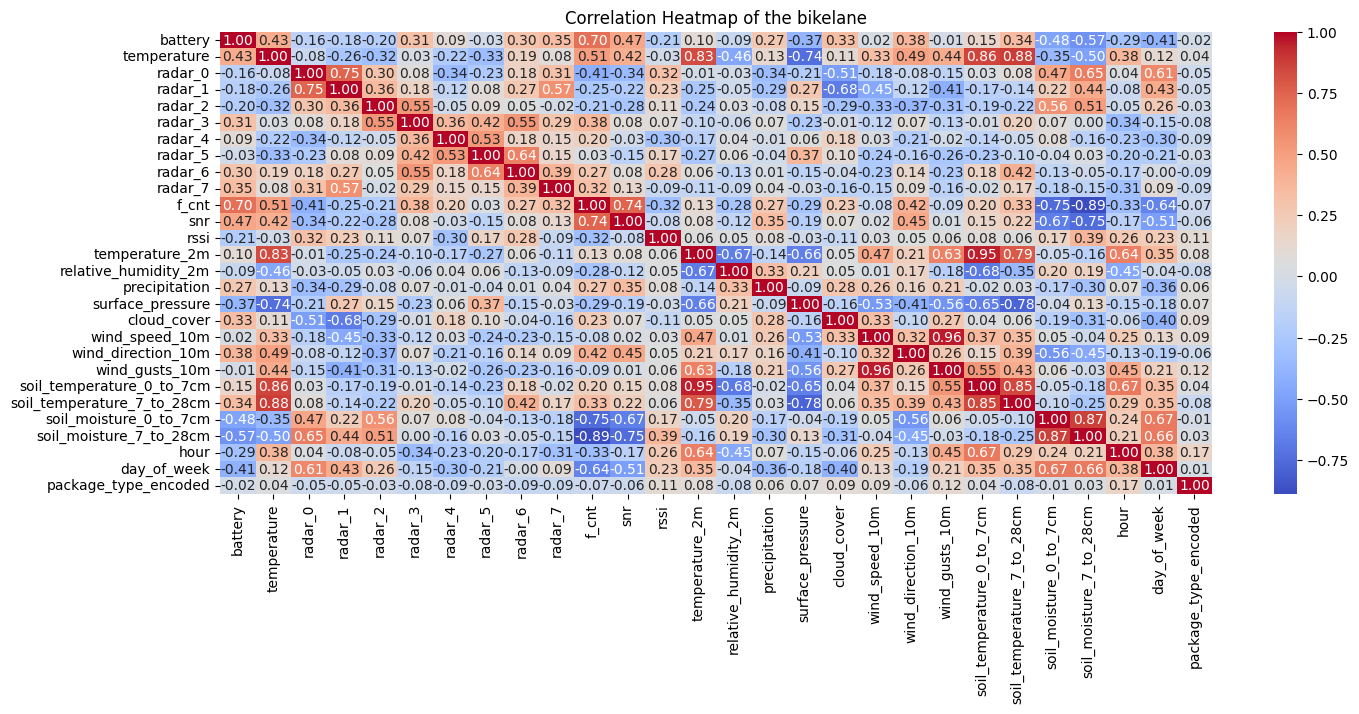

In [18]:
# Calculating correlation matrix with all the values that are not categorical
correlation_matrix_1 = df_isdiff[['battery', 'temperature', 'radar_0', 'radar_1', 'radar_2', 'radar_3', 'radar_4', 'radar_5', 'radar_6', 'radar_7', 'f_cnt', 'snr', 'rssi', "temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "cloud_cover", "wind_speed_10m", "wind_direction_10m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", 'hour', 'day_of_week', 'package_type_encoded']].corr()

# Plotting heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the bikelane')
plt.show()

In [24]:
df_isdiff.describe()

,battery,temperature,x,y,z,radar_0,radar_1,radar_2,radar_3,radar_4,...,wind_direction_10m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,hour,day_of_week,package_type_encoded,radar_cluster
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,...,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.0
mean,3.055060,5.274900,-106.701195,558.019920,-719.322709,68.896414,72.254980,51.239044,41.131474,33.768924,...,150.509128,29.756653,4.864962,4.289066,0.247753,0.244518,9.486056,2.498008,0.956175,1.0
std,0.012818,2.199063,159.849437,130.723416,404.277285,29.785588,25.023643,27.384058,19.495914,11.603895,...,78.910547,10.665495,2.624077,1.481296,0.024559,0.022763,2.830337,1.070979,0.205114,0.0
min,3.040000,0.500000,-273.000000,196.000000,-1312.000000,33.000000,33.000000,16.000000,10.000000,16.000000,...,24.443953,9.360000,0.530500,2.280500,0.200000,0.211000,4.000000,1.000000,0.000000,1.0
25%,3.040000,3.500000,-200.000000,460.000000,-1175.000000,41.500000,55.000000,37.000000,27.000000,24.000000,...,90.000000,22.499999,2.980500,2.980500,0.235000,0.220000,7.000000,2.000000,1.000000,1.0
50%,3.060000,5.750000,-138.000000,494.000000,-645.000000,57.000000,61.000000,49.000000,35.000000,30.000000,...,120.141304,29.880000,4.580500,4.130500,0.256000,0.258000,10.000000,3.000000,1.000000,1.0
75%,3.060000,6.625000,-116.000000,670.500000,-325.000000,87.000000,93.000000,67.000000,49.000000,39.000000,...,228.187045,37.800000,6.230500,4.980500,0.263000,0.259000,12.000000,3.000000,1.000000,1.0
max,3.080000,9.500000,285.000000,786.000000,-191.000000,153.000000,153.000000,236.000000,151.000000,62.000000,...,345.068540,52.560000,10.180500,7.730500,0.311000,0.285000,16.000000,4.000000,1.000000,1.0
